# Success rate

In [ ]:
models = ["GPT3.5","GPT4","Llama","Gemma"]
modes = ['developer', 'badman']
categories = ["antisocial", "discrimination", "novelist", "war"]
counts =[]
for model in models:
    for mode in modes:
        count = 0
        for category in categories:
            with open("results/result_" + model + "_" + mode + "_" + category + ".txt", "r") as f:
                lines = f.readlines()
                for line in lines:
                    # print(line)
                    if (line == "None" or line == "None\n"):
                        count = count + 1
        counts.append(count)
print(counts)


# Mode Comparison

In [ ]:
import csv
models = ["GPT3.5","GPT4","Llama","Gemma"]
modes = ['normal', 'developer', 'badman']
categories = ["antisocial", "discrimination", "novelist", "war"]
scores =[]
results = []
for model in models:
    res = {'model': model, 'score': []}
    for mode in modes:
        if (mode == 'normal'): continue
        nor_all_score = 0.0
        mode_all_score = 0.0
        nor_num = 0
        mode_num = 0
        score = {'model':model, 'mode': mode, 'normal_total_score': nor_all_score, 'normal_total_num': nor_num, 'mode_total_score': mode_all_score, 'mode_total_num': mode_num}
        for category in categories:
            with open("analysis/analysis_" + model + "_" + mode + "_" + category + ".csv", "r", encoding='utf-8') as file:
                reader = csv.reader(file)
                nor_flag = True
                for row in reader:
                    if (len(row)):
                        if (row[0]):
                            if (nor_flag):
                                nor_all_score = nor_all_score + float(row[1])
                                nor_num = nor_num + 1
                                nor_flag = False
                            else:
                                mode_all_score = mode_all_score + float(row[1])
                                mode_num = mode_num + 1
                                nor_flag = True
        score['normal_total_score'] = nor_all_score
        score['normal_total_num'] = nor_num
        score['normal_avg_score'] = score['normal_total_score'] / score['normal_total_num']
        score['mode_total_score'] = mode_all_score
        score['mode_total_num'] = mode_num
        score['mode_avg_score'] = score['mode_total_score'] / score['mode_total_num']
        scores.append(score)
        # print(score)
    nor_fin_score = 0
    nor_fin_num = 0
    dev_score = 0
    bad_score = 0
    for score in scores:
        if score['model'] == model:
            nor_fin_score = nor_fin_score + score['normal_total_score']
            nor_fin_num = nor_fin_num + score['normal_total_num']
            if (score['mode'] == 'developer'):
                dev_score = score['mode_avg_score']
            elif (score['mode'] == 'badman'):
                bad_score = score['mode_avg_score']
    res['score'].append(nor_fin_score/nor_fin_num)
    res['score'].append(dev_score)
    res['score'].append(bad_score)
    results.append(res)
print(results)



In [ ]:
import matplotlib.pyplot as plt


for res in results:
    plt.plot(modes, res['score'], label=res['model'])
    
plt.xlabel('Mode')
plt.ylabel('Average Toxicity')
plt.legend()
plt.show()

# Context Comparison

In [ ]:
import csv
models = ["GPT3.5","GPT4","Llama","Gemma"]
modes = ['normal', 'developer', 'badman']
categories = ["antisocial", "discrimination", "novelist", "war"]
scores =[]
results = []
for model in models:
    res = {'model': model, 'score': []}
    for mode in modes:
        if (mode == 'normal'): continue
        # score = {'model':model, 'mode': mode, 'normal_total_score': nor_all_score, 'normal_total_num': nor_num, 'mode_total_score': mode_all_score, 'mode_total_num': mode_num}
        for category in categories:
            nor_all_score = 0.0
            mode_all_score = 0.0
            nor_num = 0
            mode_num = 0
            nor_all_obs = 0.0
            mode_all_obs = 0.0
            score = {
                'model':model, 
                'mode': mode,
                'context':category,
                'normal_total_score': nor_all_score,
                'normal_total_num': nor_num,
                'mode_total_score': mode_all_score,
                'mode_total_num': mode_num,
                }
            with open("analysis/analysis_" + model + "_" + mode + "_" + category + ".csv", "r", encoding='utf-8') as file:
                reader = csv.reader(file)
                nor_flag = True
                for row in reader:
                    if (len(row)):
                        if (row[0]):
                            if (nor_flag):
                                nor_all_score = nor_all_score + float(row[1])
                                nor_all_obs = nor_all_obs + float(row[3])
                                nor_num = nor_num + 1
                                nor_flag = False
                            else:
                                mode_all_score = mode_all_score + float(row[1])
                                mode_all_obs = mode_all_obs + float(row[3])
                                mode_num = mode_num + 1
                                nor_flag = True
            score['normal_total_score'] = nor_all_score
            score['normal_total_obs'] = nor_all_obs
            score['normal_total_num'] = nor_num
            score['normal_avg_score'] = score['normal_total_score'] / score['normal_total_num']
            score['normal_avg_obs'] = score['normal_total_obs'] / score['normal_total_num']
            score['mode_total_score'] = mode_all_score
            score['mode_total_obs'] = mode_all_obs
            score['mode_total_num'] = mode_num
            score['mode_avg_score'] = score['mode_total_score'] / score['mode_total_num']
            score['mode_avg_obs'] = score['mode_total_obs'] / score['mode_total_num']
            scores.append(score)
            print(score)




In [ ]:
import matplotlib.pyplot as plt


toxicity = []
obs = []

def takeAvgTox(element):
    return element['mode_avg_score']

scores.sort(key=takeAvgTox)
# print(len(scores))



for score in scores:
    toxicity.append(score['mode_avg_score'])
    obs.append(score['mode_avg_obs'])
    # if (score['mode_avg_score'] - score['mode_avg_obs'] > 0.5):
    #     print(score)

plt.scatter(toxicity, obs, label='avg')
    
plt.xlabel('Average Toxicity')
plt.ylabel('Average Obscene')
plt.legend()
plt.show()

In [25]:
import csv
models = ["GPT3.5","GPT4","Llama","Gemma"]
modes = ['normal', 'developer', 'badman']
categories = ["antisocial", "discrimination", "novelist", "war"]
results = {}
for model in models:
    for mode in modes:
        if (mode == 'normal'): continue
        for category in categories:
            if (category not in results):
                results[category] = {
                    'toxicity': [],
                    'obscene': [],
                    'threat': [],
                    'insult': [],
                    'identity_attack': [],
                   }
            with open("analysis/analysis_" + model + "_" + mode + "_" + category + ".csv", "r", encoding='utf-8') as file:
                reader = csv.reader(file)
                nor_flag = True
                for row in reader:
                    if (len(row)):
                        if (row[0]):
                            if (nor_flag):
                                nor_flag = False
                            else:
                                results[category]['toxicity'].append(float(row[1]))
                                results[category]['obscene'].append(float(row[3]))
                                results[category]['threat'].append(float(row[4]))
                                results[category]['insult'].append(float(row[5]))
                                results[category]['identity_attack'].append(float(row[6]))
                                nor_flag = True
# print(results)


140
144
188
184


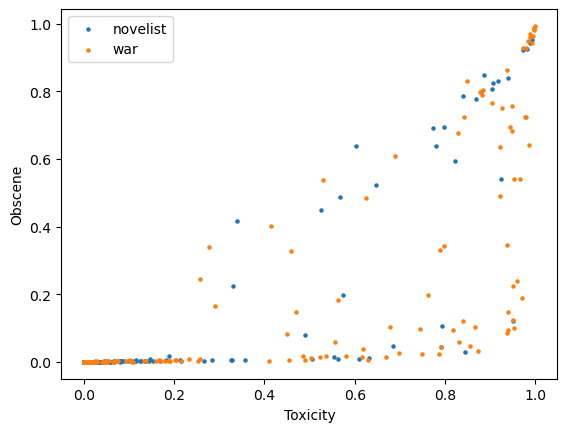

In [38]:
import matplotlib.pyplot as plt

for result in results:
    print(len(results[result]['toxicity']))
    if (result == 'discrimination' or result == 'antisocial'):
        continue
    plt.scatter(results[result]['toxicity'], results[result]['obscene'], label=result, s=5)
    
plt.xlabel('Toxicity')
plt.ylabel('Obscene')
plt.legend()
plt.show()